## Кирилл Конча БКЛ181 

## Задание 1

Для удобства импортируем сразу все нужные модули, чтобы потом было проще.


In [149]:
%load_ext pycodestyle_magic
%pycodestyle_on
import collections
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.collocations import ngrams
from nltk.probability import FreqDist
from nltk.collocations import BigramCollocationFinder
import seaborn as sns
import random
from collections import defaultdict
random.seed = 23
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from pymorphy2 import MorphAnalyzer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.draw.dispersion import dispersion_plot

Используем часть кода из предыдущей части задания. Далее составим словарь грамматических категорий и заполним его. Создадим дата фрейм. Также сохраним потом получивший файл, как тоже было в семинаре.

In [212]:
with open('ochered.txt') as f:
    text = f.read()

sw = stopwords.words('russian')
words = [w.lower() for w in word_tokenize(text) if w.isalpha()]
filtered = [w for w in words if w not in sw]
first = morph.parse(filtered[0])
dict_frame = {}
dict_frame['lex'] = []
dict_frame['word'] = []
dict_frame['case'] = []
dict_frame['POS'] = []
dict_frame['number'] = []
dict_frame['gender'] = []

for word in filtered:
    result = morph.parse(word)
    dict_frame['lex'].append(result[0].normal_form)
    dict_frame['word'].append(result[0].word)
    dict_frame['case'].append(result[0].tag.case)
    dict_frame['POS'].append(result[0].tag.POS)
    dict_frame['number'].append(result[0].tag.number)
    dict_frame['gender'].append(result[0].tag.gender)

data_frame = pd.DataFrame(dict_frame)

data_frame.to_csv(
    'sorokin.csv',
    sep='\t',
    index=False,
)

data_frame

,lex,word,case,POS,number,gender
0,товарищ,товарищ,nomn,NOUN,sing,masc
1,последний,последний,nomn,ADJF,sing,masc
2,наверно,наверно,None,ADVB,None,None
3,я,мной,ablt,NPRO,sing,None
4,женщина,женщина,nomn,NOUN,sing,femn
...,...,...,...,...,...,...
13056,табак,табака,gent,NOUN,sing,masc
13057,любить,люблю,None,VERB,sing,None
13058,спать,спишь,None,VERB,sing,None
13059,спать,сплю,None,VERB,sing,None


## Задание 2

Сделаем облако слов (без стоп-слов)

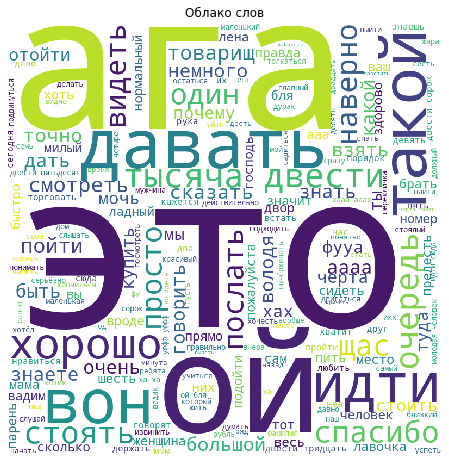

In [213]:
text = ' '.join(data_frame['lex'])

wordcloud = WordCloud(background_color='white',
                      width=800, height=800).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Облако слов')
plt.show()

Посчитаем количество слов с каждым родом.

Text(0, 0.5, 'number of entries')

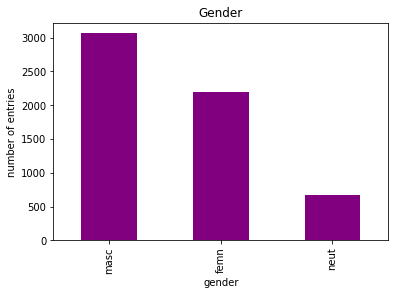

In [214]:
data_frame['gender'].value_counts().plot.bar(color='purple')
plt.title('Gender')
plt.xlabel('gender')
plt.ylabel('number of entries')

А вот это гистограмма длины слов (правда я не уверен, что она должна так выглядеть)

Text(0.5, 0, 'Length of word')

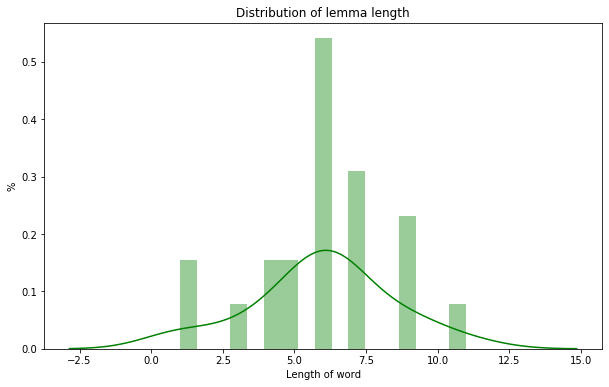

In [215]:
length = data_frame['lex'].apply(len)
plt.figure(figsize=(10, 6))
sns.distplot(df['length'], bins=17, color='green')
plt.title('Distribution of lemma length')
plt.ylabel('%')
plt.xlabel('Length of word')

По аналогии с семинаром также сделаем график, который показывает слова какого рода самые употребительные

Text(0.5, 1.0, 'Most frequency gender')

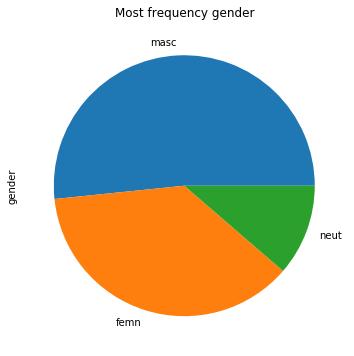

4:1: W391 blank line at end of file
4:1: W391 blank line at end of file
4:1: W391 blank line at end of file
4:1: W391 blank line at end of file
4:1: W391 blank line at end of file
4:1: W391 blank line at end of file


In [217]:
plt.figure(figsize=(6, 6))
data_frame['gender'].value_counts().plot(kind='pie')
plt.title('Most frequency gender')


## Задание 3

Из предыдущей части задания возьмем код, считающий самые частотные биграммы, сделаем из него дата фрейм.

In [147]:
finder = BigramCollocationFinder.from_words(filtered, window_size=3)
bgram = list(finder.ngram_fd.items())
bgram.sort(key=lambda item: item[-1], reverse=True)

bgram_dict = {'bigram': [], 'frequency': []}

for i in bgram:
    bgram_dict['bigram'].append(str(i[0][0]) + ' ' + str(i[0][1]))
    bgram_dict['frequency'].append(i[1])

data_frame_1 = pd.DataFrame(bgram_dict)
data_frame_1

,bigram,frequency
0,тысяча двести,79
1,xа xа,37
2,уффф уффф,26
3,xаx xаx,25
4,двести тридцать,24
...,...,...
23289,табака люблю,1
23290,табака спишь,1
23291,люблю спишь,1
23292,люблю сплю,1


Теперь посмотрим, как распределяются между собой части речи.

Text(0.5, 1.0, 'POS Frequency')

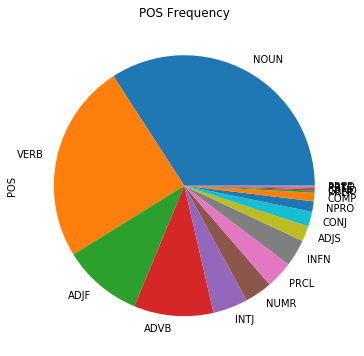

In [167]:
list_of_POS = []
morph = MorphAnalyzer()
plot_dict = {'POS': []}
for word in filtered:
    ana = morph.parse(word)
    if ana[0].tag.POS:
        plot_dict['POS'].append((ana[0].tag.POS))

df2 = pd.DataFrame(plot_dict)
plt.figure(figsize=(6, 6))
df2['POS'].value_counts().plot(kind='pie')
plt.title('POS Frequency')

И наконец, посчитаем для романа "Очередь" распределение слова "очередь" по падежам. Для этого надо будет прочитать csv файл, который мы сохранили выше.

Text(0, 0.5, 'case')

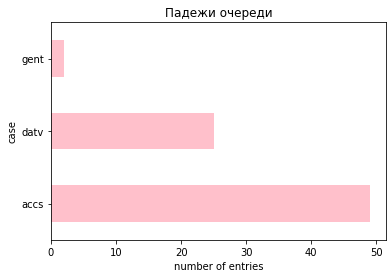

In [225]:
sorokin = pd.read_csv('sorokin.csv', sep='\t').fillna('')

data_frame3 = sorokin[sorokin['lex'] == 'очередь'][
    'case'].value_counts().plot.barh(color='pink')
plt.title('Падежи очереди')
plt.xlabel('number of entries')
plt.ylabel('case')

## Задание 4

Посчитаем упоминания героев текста.

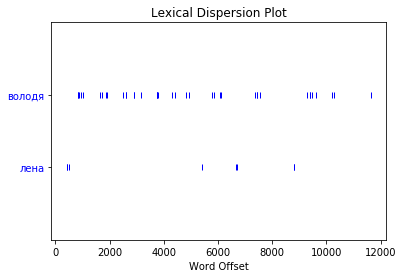

In [208]:
characters = ['володя', 'лена']

disp = dispersion_plot(filtered, characters,
                       ignore_case=True, title='Lexical Dispersion Plot')
disp